In [94]:
import pandas as pd
import matplotlib.pyplot as plt
from path import Path
%matplotlib inline

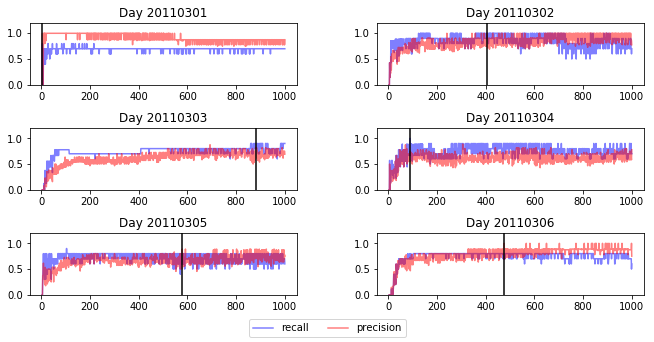

In [104]:
csv1 = pd.read_csv('experiments/experiment_1/20110301/k_values/evaluation.csv')
csv2 = pd.read_csv('experiments/experiment_1/20110302/k_values/evaluation.csv')
csv3 = pd.read_csv('experiments/experiment_1/20110303/k_values/evaluation.csv')
csv4 = pd.read_csv('experiments/experiment_1/20110304/k_values/evaluation.csv')
csv5 = pd.read_csv('experiments/experiment_1/20110305/k_values/evaluation.csv')
csv6 = pd.read_csv('experiments/experiment_1/20110306/k_values/evaluation.csv')
# csv7 = pd.read_csv('experiments/experiment_1/20110307/k_values/evaluation.csv')

csvs= [csv1,csv2,csv3,csv4,csv5,csv6]
# fig = plt.figure(figsize=(8, 1))  # a new figure window
k = [5, 404, 880, 90, 579, 476]
fig = plt.figure(figsize=(11, 5))
for i, csv in enumerate(csvs):
    ax = fig.add_subplot(3, 2, i + 1)
    ax.set_title("Day 2011030%i" % (i+1))

    x = csv['k']
    y1 = csv['recobrado']
    y2 = csv['precision']
    ax.plot(x,y1, 'b', label='recall', alpha=0.5)
    ax.plot(x,y2, 'r', label='precision', alpha=0.5)
    ax.axvline(x=k[i], color='k')
    ax.set_ylim(0,1.2)
    
#     ax.set_xlabel('k values')
#     ax.grid(True, lw = 1, ls = '--', c = '.8')
fig.subplots_adjust(wspace=0.3, hspace=0.7)
fig.legend(['recall', 'precision'], loc='lower center', ncol=2)


/home/rox/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  


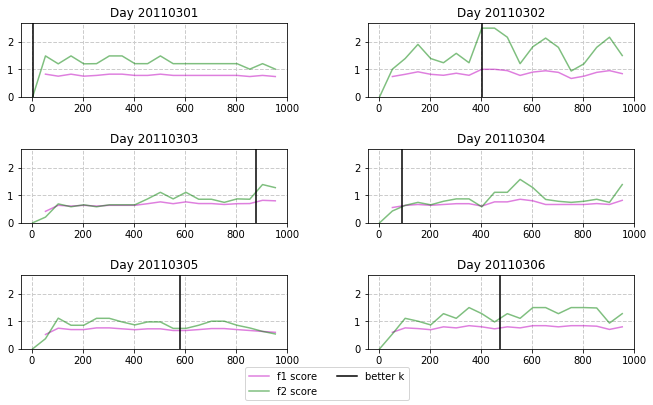

In [106]:
def f1(precision,recall):
    return 2*(precision*recall)/(precision+recall)

def f2(precision, recall):
    return 5*(precision*recall)/4*(precision+recall)

def get_max(a):
    max_index = a.argmax()
    return a[max_index], max_index
k = []
fig = plt.figure(figsize=(11, 6))
for i, csv in enumerate(csvs):
    ax = fig.add_subplot(3, 2, i + 1)
    ax.set_title("Day 2011030%i" % (i+1))
    x = csv['k']
    y1 = csv['recobrado']
    y2 = csv['precision']
    
    f1_values = f1(y2,y1)
    f2_values = f2(y2,y1)
    max_f1, max_f1_index = get_max(f1_values)
    max_f2, max_f2_index = get_max(f2_values)
    k.append(x[max_f1_index])
    ax.plot(x[::50],f1_values[::50], 'm', label='f1', alpha=0.5)
    ax.plot(x[::50],f2_values[::50], 'g', label='f2', alpha=0.5)
    ax.axvline(x=x[max_f1_index], color='k', label='k')
    ax.set_ylim(0,2.7)
    ax.grid(True, lw = 1, ls = '--', c = '.8')
    

fig.subplots_adjust(wspace=0.3, hspace=0.7)
fig.legend(['f1 score', 'f2 score', 'better k' ], loc='lower center', ncol=2)


/home/rox/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


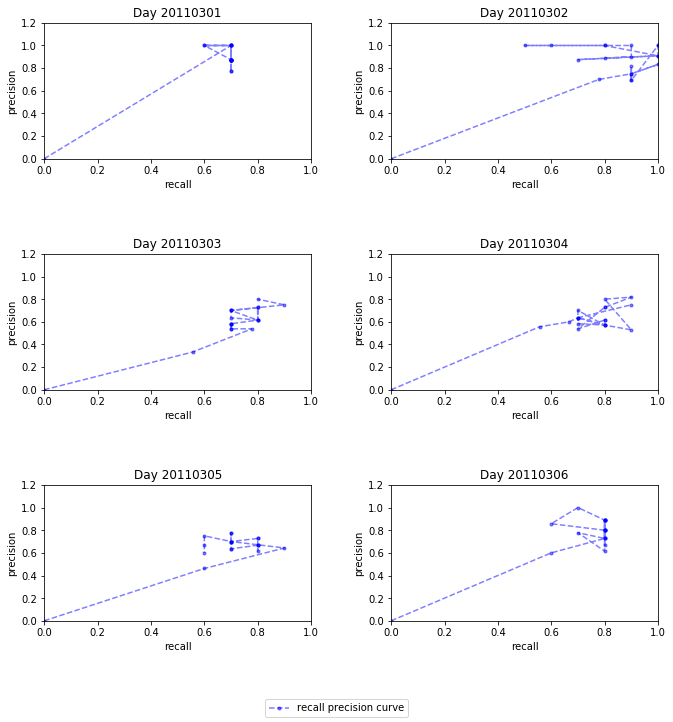

In [99]:

fig = plt.figure(figsize=(11, 11))
for i, csv in enumerate(csvs):
    ax = fig.add_subplot(3, 2, i + 1)
    ax.set_title("Day 2011030%i" % (i+1))

    x = csv['k']
    y1 = csv['recobrado']
    y2 = csv['precision']
    ax.plot(y1[::50],y2[::50], '.--b', label='pres vs. recall', alpha=0.5)
    ax.set_xlabel('recall')
    ax.set_ylabel('precision')
    ax.set_ylim(0,1.2)
    ax.set_xlim(0,1)
fig.subplots_adjust(wspace=0.3, hspace=0.7)
fig.legend(['recall precision curve'], loc='lower center', ncol=2)
fig.show()

In [116]:
import os
eval_csvs=[]
root_dir = 'experiments/experiment_1/'
sub_dirs = []

for root, subdirs, files in os.walk(root_dir):
    eval_csvs.extend([os.path.join(root, x) for x in files if x.startswith('evaluation')])

print(eval_csvs)
cols = len(eval_csvs)/2 if (len(eval_csvs)/2).is_integer() else len(eval_csvs)/2 +1
print(cols)

['experiments/experiment_1/evaluation_analysis.json', 'experiments/experiment_1/20110306/k_values/evaluation.csv', 'experiments/experiment_1/20110307/k_values/evaluation.csv', 'experiments/experiment_1/20110305/k_values/evaluation.csv', 'experiments/experiment_1/20110304/k_values/evaluation.csv', 'experiments/experiment_1/20110301/k_values/evaluation.csv', 'experiments/experiment_1/20110303/k_values/evaluation.csv', 'experiments/experiment_1/20110302/k_values/evaluation.csv']
4.0


In [127]:
a = Path('experiments/experiment_1/20110306/k_values/evaluation.csv')

title = a.dirname().split('/')
title= f'{title[1]}_{title[2]}'
title


'experiment_1_20110306'

In [111]:
6/2

3.0

In [115]:
a = 6/2
a.is_integer()

True